<a href="https://colab.research.google.com/github/nsanju0413/DSA/blob/main/f_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import random
import math
import matplotlib.pyplot as plt

# Brute force algorithm for finding the smallest distance between two points
def brute_force_closest_points(P):
    n = len(P)
    min_dist = float('inf')
    for i in range(n):
        for j in range(i+1, n):
            dist = math.sqrt((P[i][0] - P[j][0])**2 + (P[i][1] - P[j][1])**2)
            if dist < min_dist:
                min_dist = dist
    return min_dist

# Divide and conquer algorithm for finding the smallest distance between two points
def divide_and_conquer_closest_points(P):
    n = len(P)
    if n <= 3:
        return brute_force_closest_points(P)
    mid = n // 2
    P1 = P[:mid]
    P2 = P[mid:]
    dist1 = divide_and_conquer_closest_points(P1)
    dist2 = divide_and_conquer_closest_points(P2)
    dist = min(dist1, dist2)
    strip = [point for point in P if abs(point[0] - P[mid][0]) < dist]
    strip.sort(key=lambda x: x[1])
    for i in range(len(strip)):
        for j in range(i+1, len(strip)):
            if strip[j][1] - strip[i][1] >= dist:
                break
            d = math.sqrt((strip[i][0] - strip[j][0])**2 + (strip[i][1] - strip[j][1])**2)
            if d < dist:
                dist = d
    return dist

# Calculate TheoreticalRT for n^2
def theoretical_runtime(n):
    return n**2
if __name__ == "__main__":
    random.seed()
    m = 10  # number of loops
    n_iters = 10  # number of iterations
    step = 1000  # step size
    n_vals = [1000 + i * step for i in range(n_iters)]  # Generate input sizes

    empirical_rt_ALG1 = []
    empirical_rt_ALG2 = []
    predicted_rt_ALG1 = []
    predicted_rt_ALG2 = []

    print("Table for Brute Force Algorithm (ALG1):")
    print("{:<10} {:<15} {:<20} {:<10} {:<15}".format("n", "TheoreticalRT", "EmpiricalRT", "Ratio", "PredictedRT"))
    for n in n_vals:
        times_ALG1 = []
        times_ALG2 = []
        for j in range(m):
            P = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(n)]

            start = time.time()
            brute_force_closest_points(P)
            end = time.time()
            times_ALG1.append((end - start) * 1000)  # Convert to milliseconds

            start2 = time.time()
            divide_and_conquer_closest_points(P)
            end2 = time.time()
            times_ALG2.append((end2 - start2) * 1000)  # Convert to milliseconds

        avg_time_ALG1 = sum(times_ALG1) / m
        avg_time_ALG2 = sum(times_ALG2) / m

        theoretical_rt = theoretical_runtime(n)
        empirical_rt_ALG1.append(avg_time_ALG1)
        empirical_rt_ALG2.append(avg_time_ALG2)
        predicted_rt_ALG1.append(theoretical_rt)
        predicted_rt_ALG2.append(theoretical_rt)

        print("{:<10} {:<15} {:<20.3f} {:<10.3f} {:<15}".format(n, theoretical_rt, avg_time_ALG1, avg_time_ALG1 / theoretical_rt, theoretical_rt))

    print("\nTable for Divide and Conquer Algorithm (ALG2):")
    print("{:<10} {:<15} {:<20} {:<10} {:<15}".format("n", "TheoreticalRT", "EmpiricalRT", "Ratio", "PredictedRT"))
    for n in n_vals:
        times_ALG1 = []
        times_ALG2 = []
        for j in range(m):
            P = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(n)]

            start = time.time()
            brute_force_closest_points(P)
            end = time.time()
            times_ALG1.append((end - start) * 1000)  # Convert to milliseconds

            start2 = time.time()
            divide_and_conquer_closest_points(P)
            end2 = time.time()
            times_ALG2.append((end2 - start2) * 1000)  # Convert to milliseconds

        avg_time_ALG1 = sum(times_ALG1) / m
        avg_time_ALG2 = sum(times_ALG2) / m

        theoretical_rt = theoretical_runtime(n)
        empirical_rt_ALG1.append(avg_time_ALG1)
        empirical_rt_ALG2.append(avg_time_ALG2)
        predicted_rt_ALG1.append(theoretical_rt)
        predicted_rt_ALG2.append(theoretical_rt)

        print("{:<10} {:<15} {:<20.3f} {:<10.3f} {:<15}".format(n, theoretical_rt, avg_time_ALG2, avg_time_ALG2 / theoretical_rt, theoretical_rt))

Table for Brute Force Algorithm (ALG1):
n          TheoreticalRT   EmpiricalRT          Ratio      PredictedRT    
1000       1000000         965.287              0.001      1000000        
2000       4000000         2565.462             0.001      4000000        
3000       9000000         4618.413             0.001      9000000        
4000       16000000        8152.226             0.001      16000000       
5000       25000000        12630.996            0.001      25000000       
6000       36000000        18213.829            0.001      36000000       
7000       49000000        25337.160            0.001      49000000       
8000       64000000        32485.321            0.001      64000000       
9000       81000000        41499.059            0.001      81000000       
10000      100000000       50989.661            0.001      100000000      

Table for Divide and Conquer Algorithm (ALG2):
n          TheoreticalRT   EmpiricalRT          Ratio      PredictedRT    
1000       1

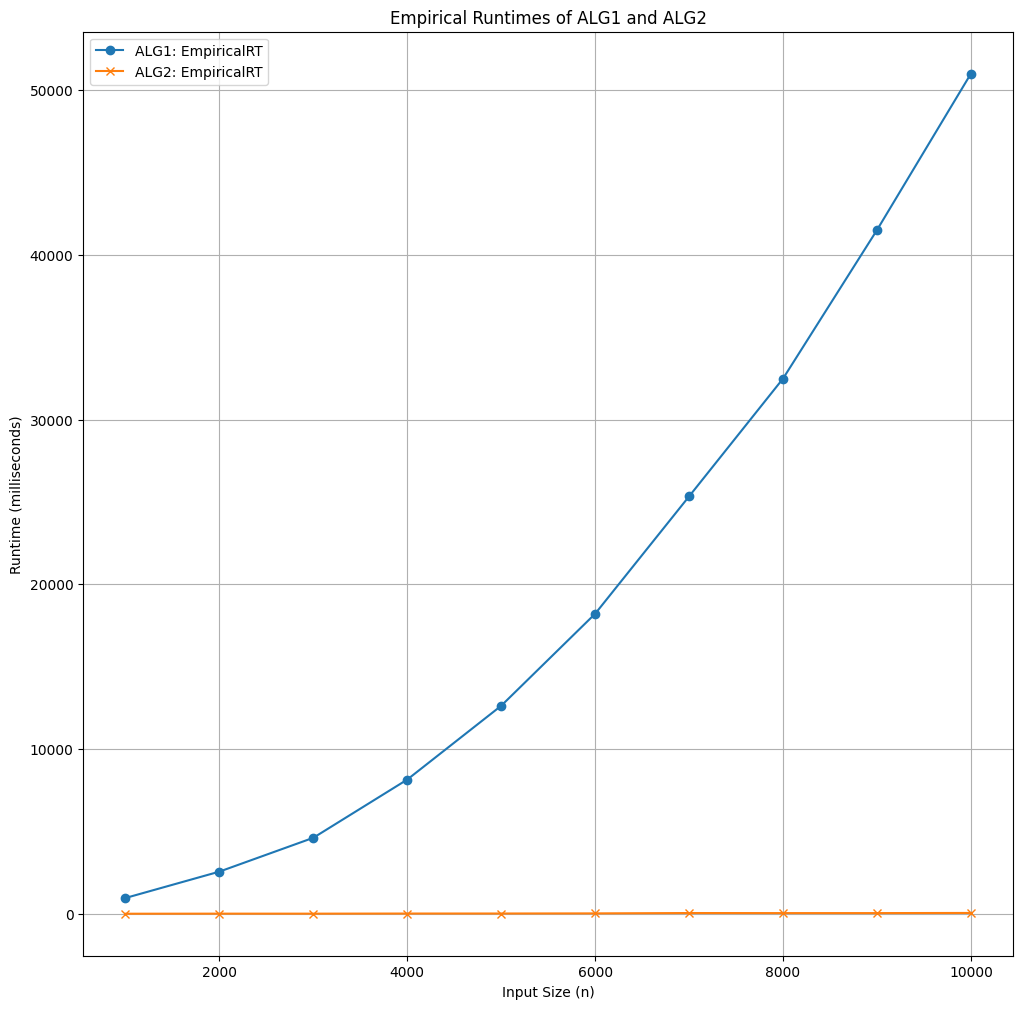

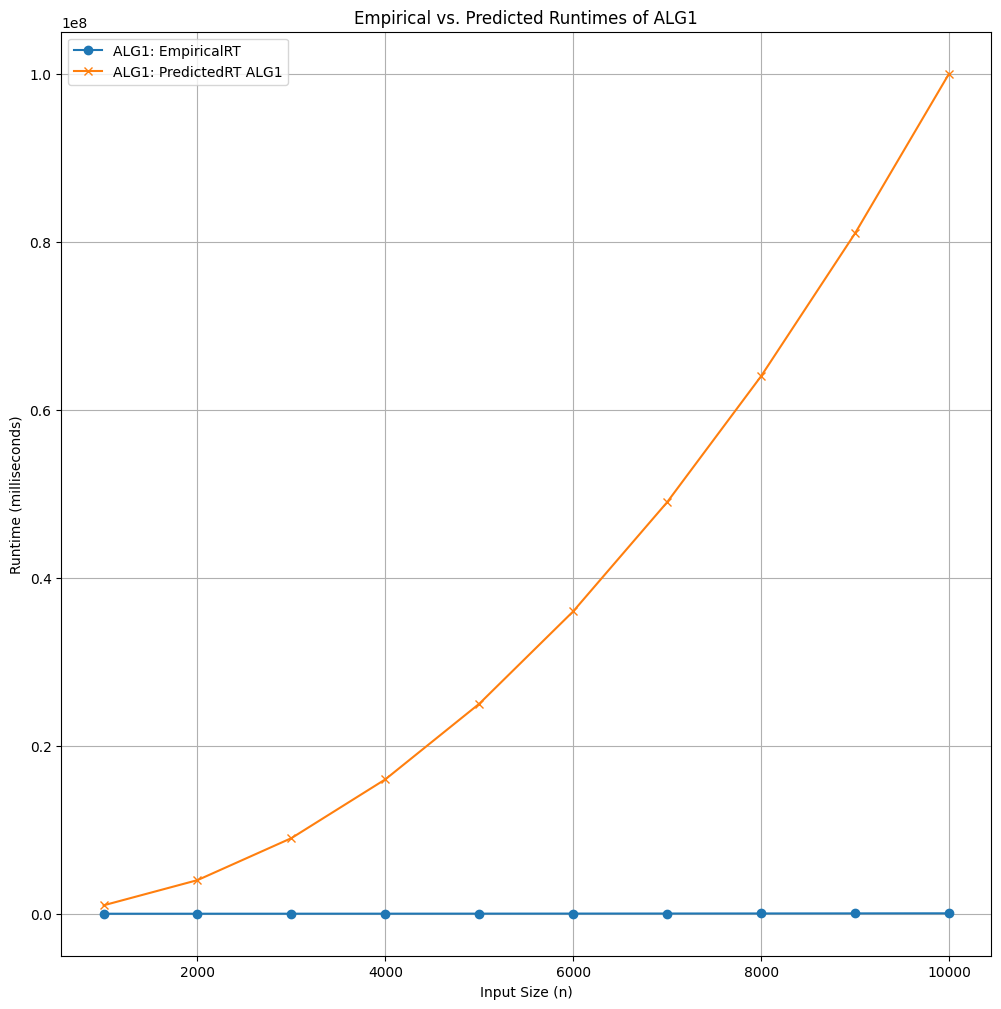

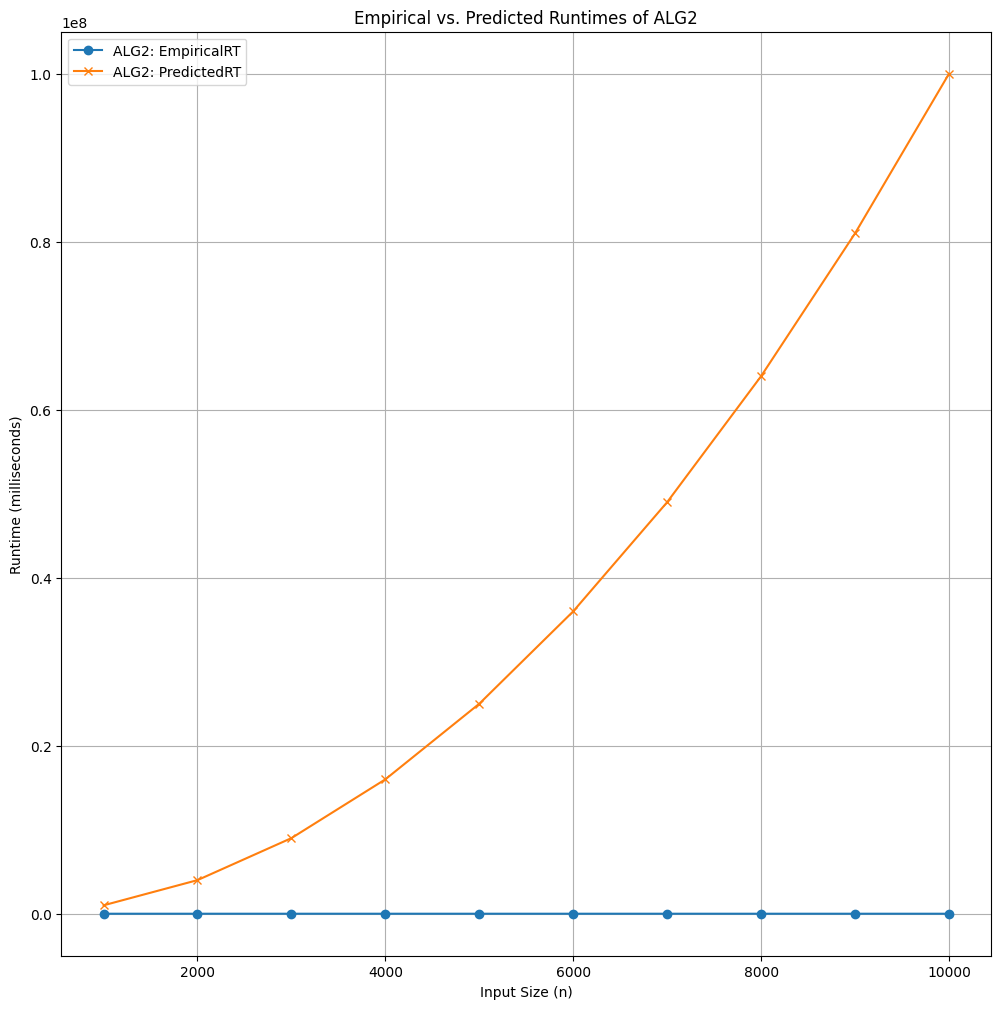

In [2]:
import matplotlib.pyplot as plt

# Adjusting the lengths of empirical_rt_ALG1 and empirical_rt_ALG2 to match the length of n_vals
empirical_rt_ALG1 = empirical_rt_ALG1[:len(n_vals)]
empirical_rt_ALG2 = empirical_rt_ALG2[:len(n_vals)]

# Graph 1: Empirical Runtimes of ALG1 and ALG2
plt.figure(figsize=(12, 12))
plt.plot(n_vals, empirical_rt_ALG1, label='ALG1: EmpiricalRT', marker='o')
plt.plot(n_vals, empirical_rt_ALG2, label='ALG2: EmpiricalRT', marker='x')
plt.xlabel('Input Size (n)')
plt.ylabel('Runtime (milliseconds)')
plt.title('Empirical Runtimes of ALG1 and ALG2')
plt.legend()
plt.grid(True)
plt.show()

# Graph 2: Empirical Runtimes of ALG1 and Predicted Runtimes of ALG1
plt.figure(figsize=(12, 12))
plt.plot(n_vals, empirical_rt_ALG1, label='ALG1: EmpiricalRT', marker='o')
plt.plot(n_vals, predicted_rt_ALG1[:len(n_vals)], label='ALG1: PredictedRT ALG1', marker='x')
plt.xlabel('Input Size (n)')
plt.ylabel('Runtime (milliseconds)')
plt.title('Empirical vs. Predicted Runtimes of ALG1')
plt.legend()
plt.grid(True)
plt.show()

# Graph 3: Empirical Runtimes of ALG2 and Predicted Runtimes of ALG2
plt.figure(figsize=(12, 12))
plt.plot(n_vals, empirical_rt_ALG2, label='ALG2: EmpiricalRT', marker='o')
plt.plot(n_vals, predicted_rt_ALG2[:len(n_vals)], label='ALG2: PredictedRT', marker='x')
plt.xlabel('Input Size (n)')
plt.ylabel('Runtime (milliseconds)')
plt.title('Empirical vs. Predicted Runtimes of ALG2')
plt.legend()
plt.grid(True)
plt.show()